<a href="https://colab.research.google.com/github/davidofitaly/neural_network/blob/main/01_intro/01_first_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [6]:
(X_train, y_train), (X_test, y_test) = load_data()


print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [8]:
np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [10]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [11]:
X_train = X_train / 255.
X_test = X_test  / 255.

(-0.5, 27.5, 27.5, -0.5)

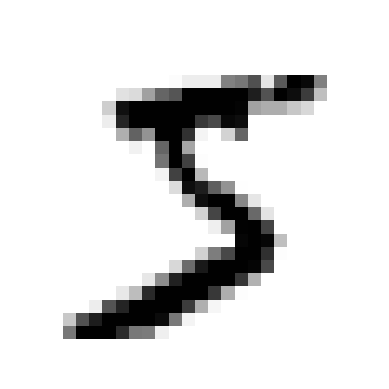

In [13]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

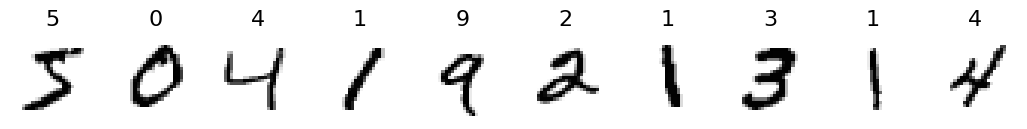

In [14]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

In [17]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9960 - loss: 0.0121
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9958 - loss: 0.0137
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0114
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9954 - loss: 0.0131
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0104


In [64]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9811 - loss: 0.1325


[0.13252396881580353, 0.9811000227928162]

In [65]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss
0,0.995950,0.011896
1,0.995717,0.013322
2,0.995800,0.012368
3,0.995467,0.013353
4,0.996283,0.010829


In [66]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

In [67]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.            , 0.            , 0.            , ..., 0.99999994    , 0.            , 0.            ],
       [0.            , 0.            , 0.99999994    , ..., 0.            , 0.            , 0.            ],
       [0.            , 0.99999994    , 0.000000025822, ..., 0.00000004754 , 0.000000000001, 0.            ],
       ...,
       [0.            , 0.            , 0.            , ..., 0.000000000853, 0.            , 0.            ],
       [0.            , 0.            , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.            , 0.            , 0.            , ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.000000002829, 0.000000003046, 0.000012908416, ..., 0.9998867     , 0.000000037634, 0.000001364077],
       [0.000000028083, 0.00011496561 , 0.9997897     , ..., 0.000000000001, 0.00000102293 , 0.000000000003],
       [0.000000076975, 0.99913883    , 0.000010470359, ..., 0.00076638814 , 0.000014185444, 0.000000042453],
       ...,
       [0.000000000001, 0.000000000027, 0.00000000147 , ..., 0.000071882656, 0.000002065583, 0.0006227006  ],
       [0.000000104811, 0.000000000303, 0.00000000009 , ..., 0.000000006382, 0.000049246966, 0.000000014977],
       [0.000000006199, 0.000000000031, 0.000000035251, ..., 0.000000000001, 0.000000001309, 0.000000000028]],
      dtype=float32)

In [68]:

predictions = model.predict(X_test)

# Uzyskanie klas z przewidywanych prawdopodobieństw
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [69]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(predicted_classes, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [71]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Index([151, 247, 274, 320, 321, 340, 445, 582, 659, 684], dtype='int64')

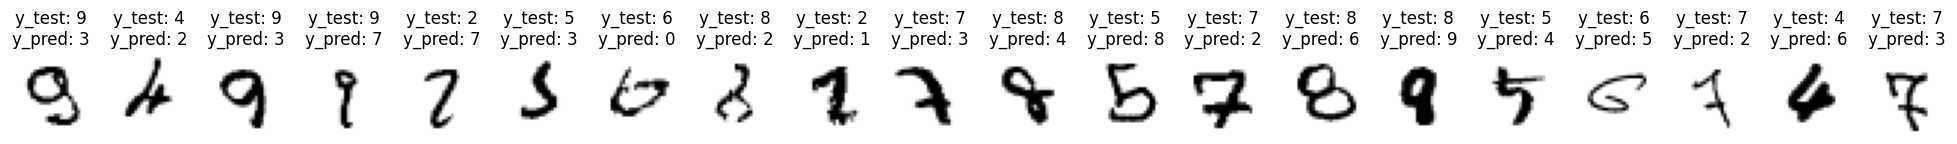

In [72]:
plt.figure(figsize=(25, 25))
for i, j in zip(range(1, 21), misclassified.index[:20]):
    plt.subplot(1, 20, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(predicted_classes[j]), color='black', fontsize=12)
plt.show()